In [1]:
import numpy as np
from matplotlib import pyplot as plt
import vaex

import illustris_python as il
from cycler import cycler

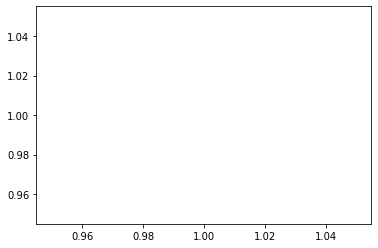

In [2]:
%matplotlib inline

plt.plot([1],[1])

font = {"weight": "normal", "size": 14}
plt.rcParams["axes.linewidth"] = 1.5  # set the value globally
plt.rc("font", **font)
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["figure.facecolor"] = "white"
_legend = {"frameon": True, "framealpha":0.7}
plt.rc("legend", **_legend)
plt.rcParams["axes.prop_cycle"] = cycler("color",('indigo','b','r','k','#ff7f0e','g'))
plt.show()

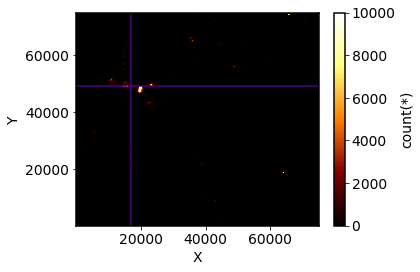

In [3]:
path = "/net/virgo01/data/users/spirov/Nexus Project/"
df = vaex.open(path+"135.hdf5")

@vaex.register_function()
def correct(x):
    L = 75000
    return np.where(np.abs(x)>L/2, x-np.sign(x)*L,x)

def localizeDataFrame(absDf, x,y,z):
    rx = absDf.X - x
    ry = absDf.Y - y
    rz = absDf.Z - z
    
    L = 75000
    
    relx = rx.correct()
    rely = ry.correct()
    relz = rz.correct()
    
    
    relR = np.sqrt(relx**2 + rely**2+relz**2)
    
    theta = np.arccos(relz/relR)
    fi = np.arctan2(rely,relx)
    
    relDf = absDf.copy()
    
    Vaway = (relx*absDf.Vx+rely*absDf.Vy+relz*absDf.Vz)/relR
    
    
    relDf["relX"] = relx
    relDf["relY"] = rely
    relDf["relZ"] = relz
    
    
    
    relDf["R"] = relR
    relDf["Th"] = theta
    relDf["Fi"] = fi
    relDf["Vr"] = Vaway

    
    return relDf
    
    

fx,fy,fz = 16896.629098069836, 49023.506989193535, 48711.977909898626

tol = 300

phil = np.abs(df.Z-fz)<tol

df[phil].viz.heatmap("X","Y",vmin=0,vmax=1e4)
plt.axhline(fy)
plt.axvline(fx)


In [4]:
fdf = localizeDataFrame(df,fx,fy,fz)

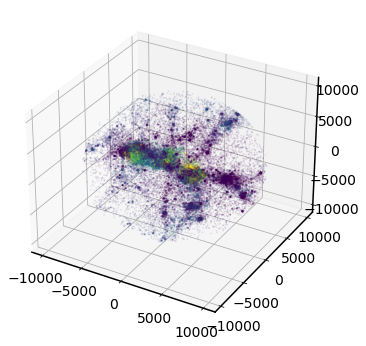

In [5]:
#%matplotlib notebook
n = 50
localFrame = fdf[fdf.R<1e4]
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values

sc = ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)

plt.show()



In [6]:
ex=20000
fdfX = localizeDataFrame(df,fx-ex,fy,fz)

In [7]:
fdfX["rho"] = (fdfX.relY**2 + fdfX.relZ**2)**0.5

tol=100

longF = fdfX[fdfX.rho<tol]

In [8]:
longF['cz'] = longF.R + longF.Vr*10

In [9]:
cZ = longF.cz.values
x = longF.relX.values

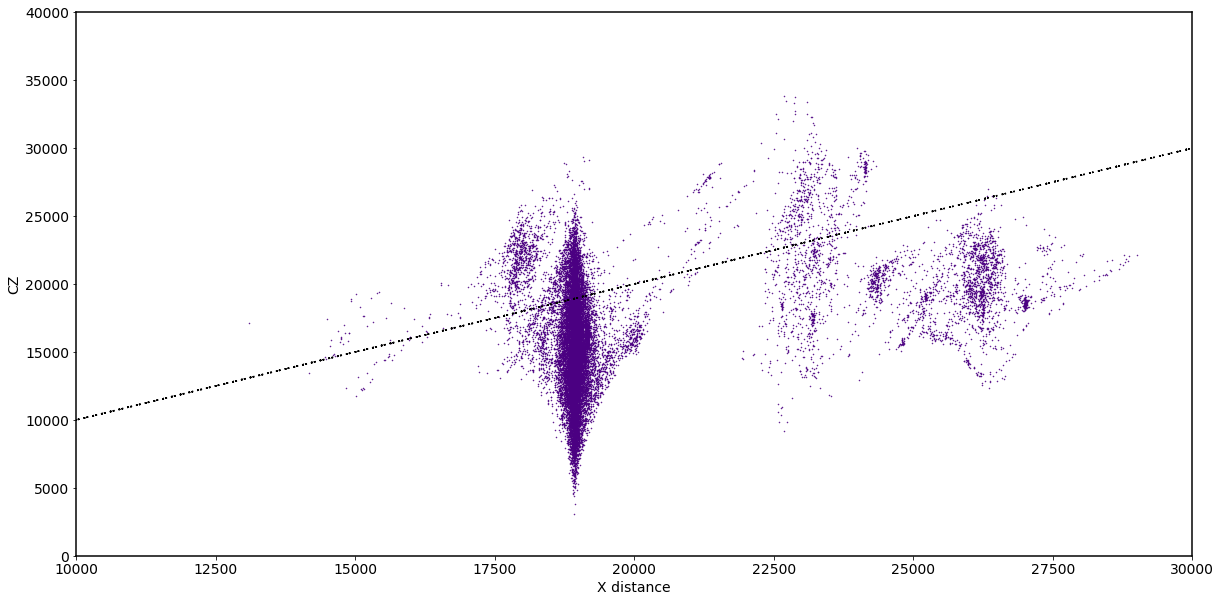

In [10]:
plt.figure(figsize=(20,10))

#plt.axvline(ex,c='b')
plt.scatter(x,cZ,marker=".",s=1)
plt.plot(x,x,linestyle=(0,(1,5)),c='k')
plt.xlim(1e4,3e4)
plt.xlabel("X distance")
plt.ylabel("CZ")
plt.ylim(0,4e4)
plt.show()

In [11]:
fdfY = localizeDataFrame(df,fx,fy-ex,fz)
fdfY["rho"] = (fdfY.relX**2 + fdfY.relZ**2)**0.5

longF = fdfY[fdfY.rho<tol]

longF['cz'] = longF.R + longF.Vr*10

cZ2 = longF.cz.values
y = longF.relY.values

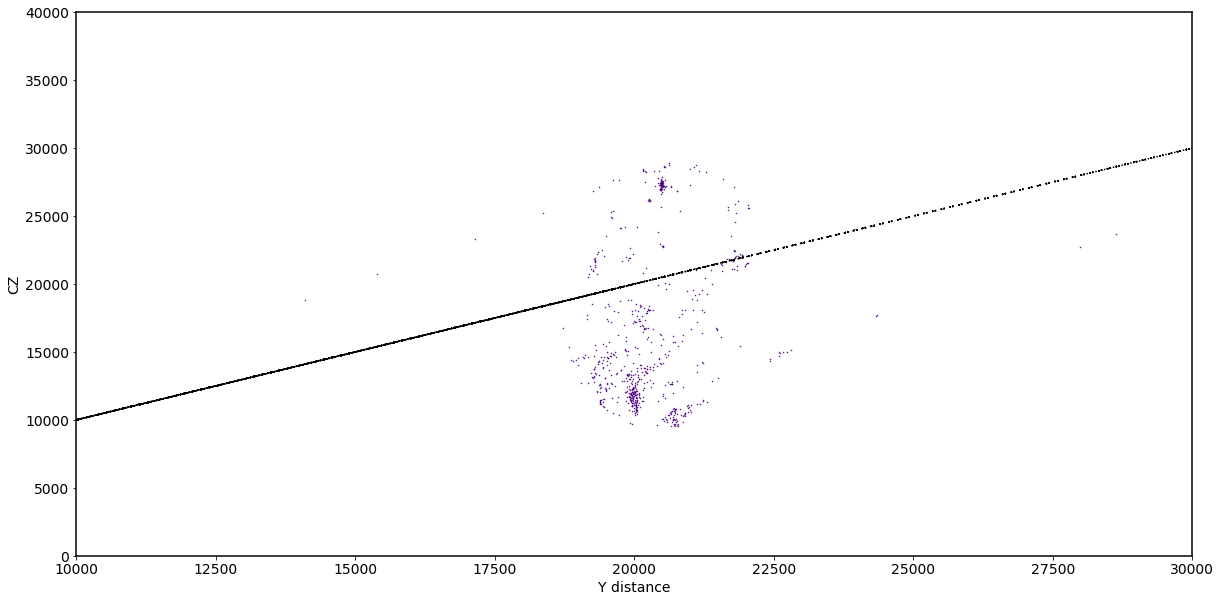

In [12]:
plt.figure(figsize=(20,10))

#plt.axvline(ex,c='b')
plt.scatter(y,cZ2,marker=".",s=1)
plt.plot(y,y,linestyle=(0,(1,5)),c='k')
plt.xlim(1e4,3e4)
plt.xlabel("Y distance")
plt.ylabel("CZ")
plt.ylim(0,4e4)
plt.show()

In [13]:
fdfZ = localizeDataFrame(df,fx,fy,fz-ex)
fdfZ["rho"] = (fdfY.relX**2 + fdfY.relY**2)**0.5

longF = fdfZ[fdfZ.rho<tol]

longF['cz'] = longF.R + longF.Vr*10

cZ3 = longF.cz.values
z = longF.relZ.values



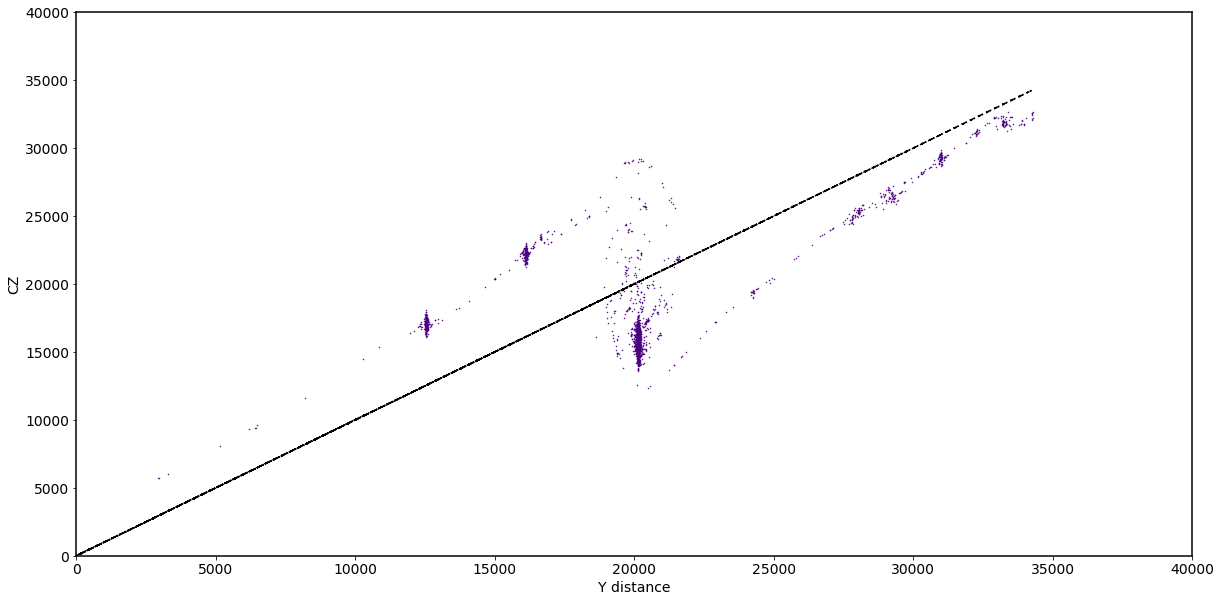

In [14]:
plt.figure(figsize=(20,10))

#plt.axvline(ex,c='b')
plt.scatter(z,cZ3,marker=".",s=1)
plt.plot(z,z,linestyle=(0,(1,5)),c='k')
plt.xlim(0,4e4)
plt.xlabel("Y distance")
plt.ylabel("CZ")
plt.ylim(0,4e4)
plt.show()

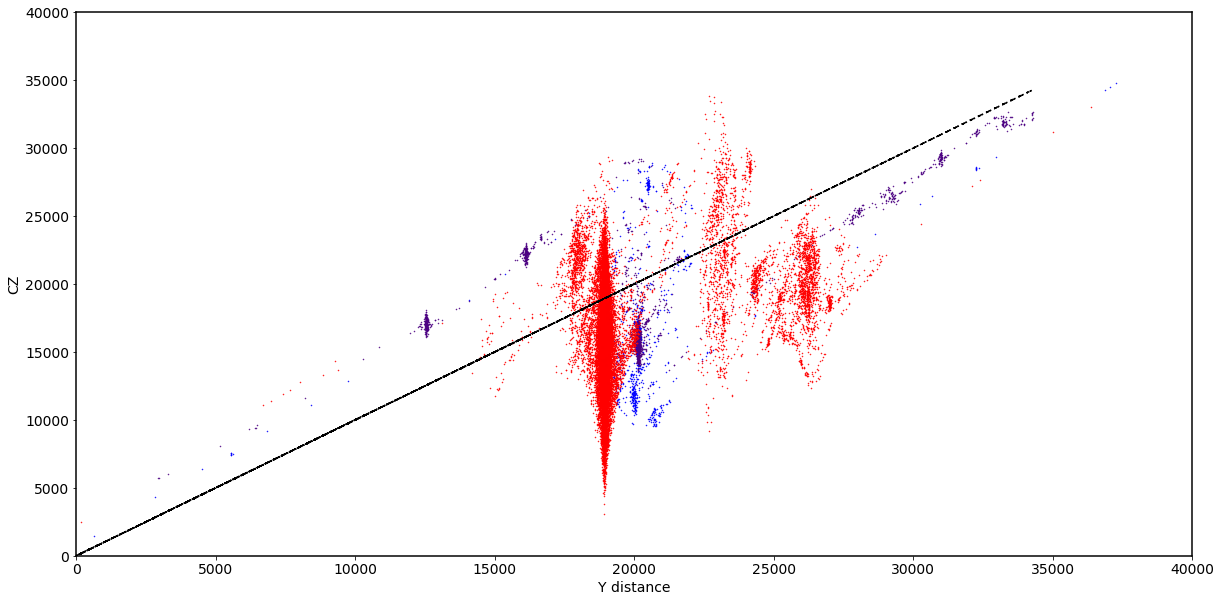

In [15]:
plt.figure(figsize=(20,10))

#plt.axvline(ex,c='b')
plt.scatter(z,cZ3,marker=".",s=1)
plt.scatter(y,cZ2,marker=".",s=1)
plt.scatter(x,cZ,marker=".",s=1)
plt.plot(z,z,linestyle=(0,(1,5)),c='k')
plt.xlim(0,4e4)
plt.xlabel("Y distance")
plt.ylabel("CZ")
plt.ylim(0,4e4)
plt.show()

# subhalos

In [16]:
path = "/net/virgo01/data/users/spirov/Nexus Project/"
subhalos = il.groupcat.load(path,135)['subhalos']

subHaloPoses = subhalos['SubhaloCM']
subhaloVels = subhalos["SubhaloVel"]

Xs = subHaloPoses[:,0]
Ys = subHaloPoses[:,1]
Zs = subHaloPoses[:,2]
Vx = subhaloVels[:,0]
Vy = subhaloVels[:,1]
Vz = subhaloVels[:,2]


df = vaex.from_arrays(X=Xs,Y=Ys,Z=Zs,Vx=Vx,Vy=Vy,Vz=Vz)

In [17]:
fdf = localizeDataFrame(df,fx,fy,fz)

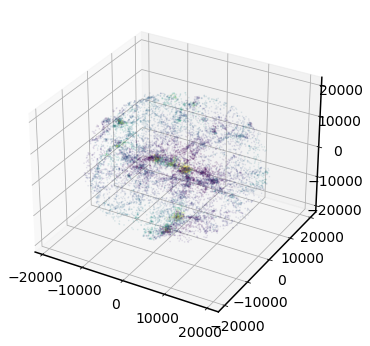

In [18]:
#%matplotlib notebook
n = 1
localFrame = fdf[fdf.R<2e4]
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection='3d')

Xs = localFrame.relX.values
Ys = localFrame.relY.values
Zs = localFrame.relZ.values
vrs = localFrame.Vr.values

sc = ax.scatter(Xs[::n],Ys[::n],Zs[::n],s=0.5,alpha = .1,c=vrs[::n],vmin = -500,vmax=500)

plt.show()



In [29]:
tol=1000

fdfY = localizeDataFrame(df,fx,fy-ex,fz)
fdfY["rho"] = (fdfY.relX**2 + fdfY.relZ**2)**0.5

longF = fdfY[fdfY.rho<tol]

longF['cz'] = longF.R + longF.Vr*10

cZ2 = longF.cz.values
y = longF.relY.values


fdfZ = localizeDataFrame(df,fx,fy,fz-ex)
fdfZ["rho"] = (fdfY.relX**2 + fdfY.relY**2)**0.5

longF = fdfZ[fdfZ.rho<tol]

longF['cz'] = longF.R + longF.Vr*10

cZ3 = longF.cz.values
z = longF.relZ.values




fdfX = localizeDataFrame(df,fx-ex,fy,fz)
fdfX["rho"] = (fdfX.relY**2 + fdfX.relZ**2)**0.5
longF = fdfX[fdfX.rho<tol]
longF['cz'] = longF.R + longF.Vr*10
cZ = longF.cz.values
x = longF.relX.values

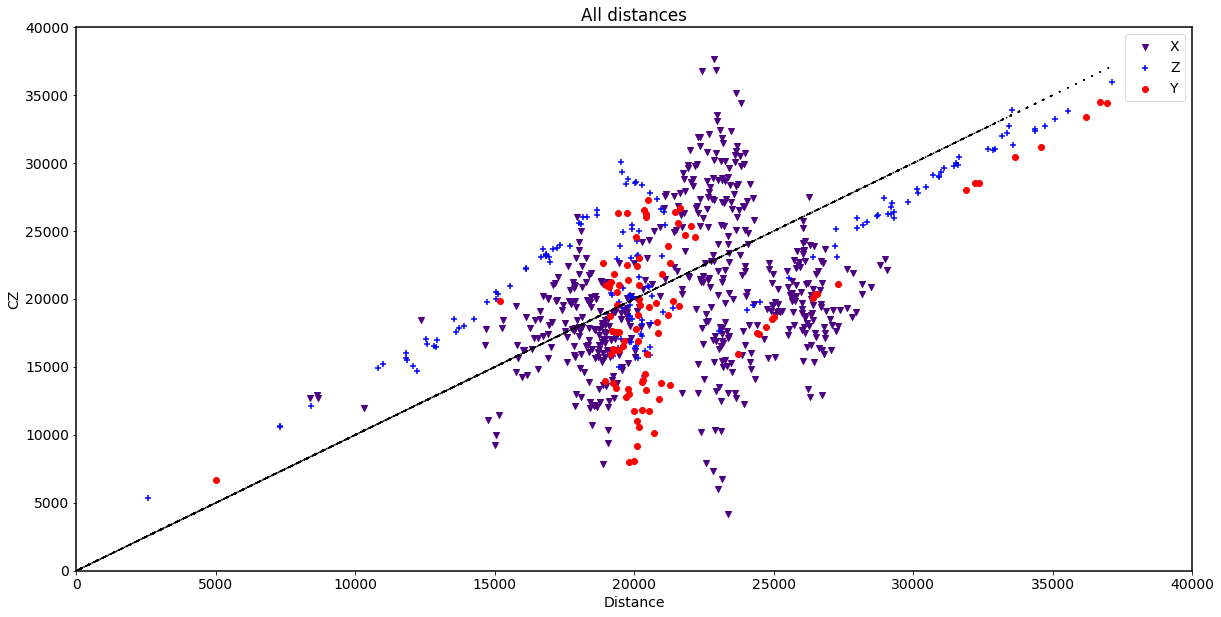

In [38]:
plt.figure(figsize=(20,10))

#plt.axvline(ex,c='b')
plt.scatter(x,cZ,marker="v",label="X")
plt.scatter(y,cZ2,marker="o",label = "Y")
plt.scatter(z,cZ3,marker="+",label = "Z")
plt.plot(z,z,linestyle=(0,(1,5)),c='k')
plt.xlim(0,4e4)
plt.xlabel("Distance")
plt.ylabel("CZ")
plt.ylim(0,4e4)
plt.legend()
plt.title('All distances')
plt.show()

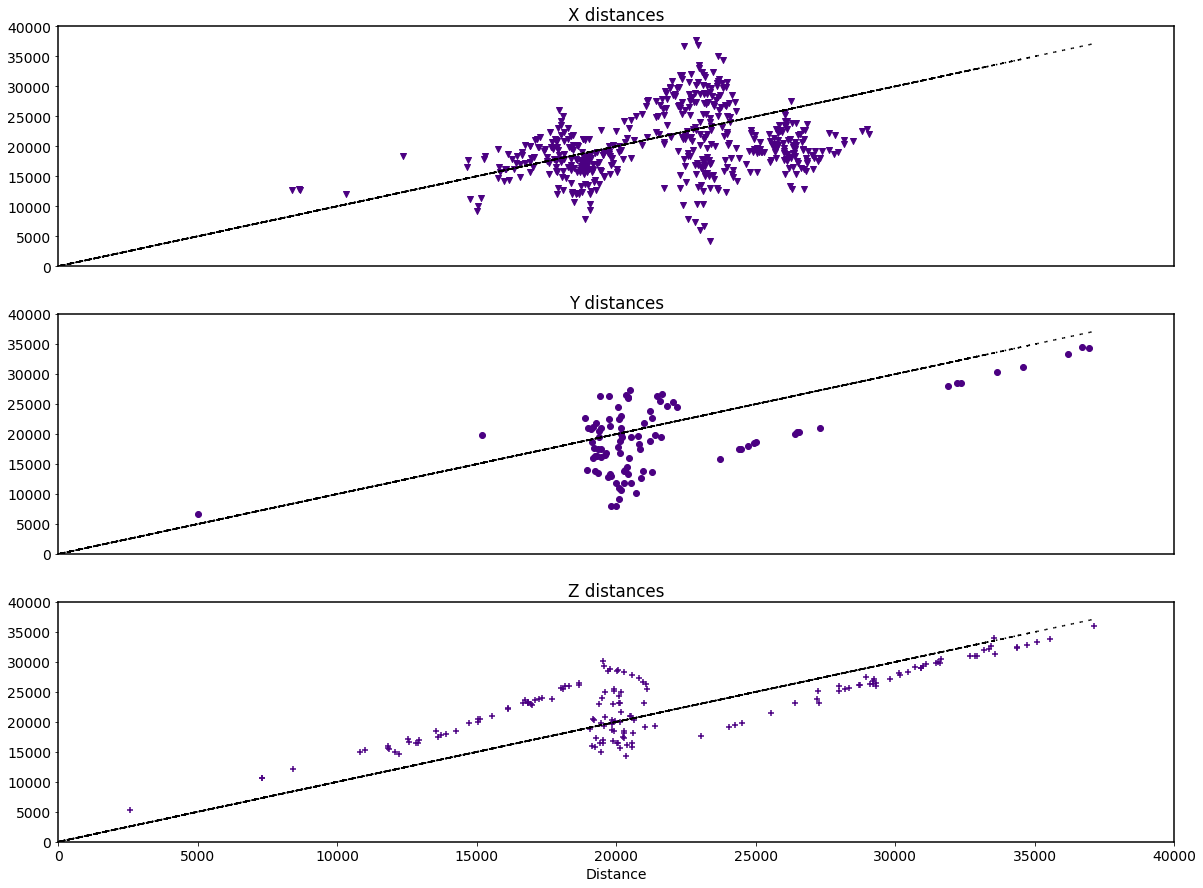

In [46]:
plt.figure(figsize=(20,15))

#plt.axvline(ex,c='b')


plt.subplot(311)
plt.title("X distances")
plt.scatter(x,cZ,marker="v",label="X")
plt.plot(z,z,linestyle=(0,(1,5)),c='k')
plt.ylim(0,4e4)
plt.xlim(0,4e4)
plt.xticks([])
plt.subplot(313)
plt.title("Z distances")
plt.scatter(z,cZ3,marker="+",label = "Z")
plt.plot(z,z,linestyle=(0,(1,5)),c='k')

plt.xlabel("Distance")
plt.ylim(0,4e4)
plt.xlim(0,4e4)
plt.subplot(312)
plt.xticks([])
plt.title("Y distances")
plt.scatter(y,cZ2,marker="o",label = "Y")
plt.plot(z,z,linestyle=(0,(1,5)),c='k')
plt.ylim(0,4e4)
plt.xlim(0,4e4)
#plt.legend()
plt.show()